In [10]:
import requests
import pandas as pd

In [21]:
import http.client

conn = http.client.HTTPSConnection("meteostat.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "1058f1eee4msha53c5d87bf9070ap1945dcjsn9e912248efba",
    'x-rapidapi-host': "meteostat.p.rapidapi.com"
}

conn.request("GET", "/stations/hourly?station=10637&start=2020-01-01&end=2020-01-01&tz=Europe%2FBerlin", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"meta":{"generated": "2024-11-21 15:47:46"},"data":[{"time":"2020-01-01 00:00:00","temp":0.3,"dwpt":-1.5,"rhum":88.0,"prcp":0.0,"snow":null,"wdir":40.0,"wspd":8.6,"wpgt":13.0,"pres":1036.9,"tsun":0,"coco":3},{"time":"2020-01-01 01:00:00","temp":0.0,"dwpt":-1.4,"rhum":90.0,"prcp":0.0,"snow":0.0,"wdir":40.0,"wspd":9.7,"wpgt":15.0,"pres":1036.5,"tsun":0,"coco":3},{"time":"2020-01-01 02:00:00","temp":0.1,"dwpt":-1.3,"rhum":90.0,"prcp":0.0,"snow":null,"wdir":20.0,"wspd":10.1,"wpgt":15.0,"pres":1036.3,"tsun":0,"coco":5},{"time":"2020-01-01 03:00:00","temp":-1.1,"dwpt":-2.2,"rhum":92.0,"prcp":0.0,"snow":null,"wdir":70.0,"wspd":7.9,"wpgt":13.0,"pres":1036.2,"tsun":0,"coco":2},{"time":"2020-01-01 04:00:00","temp":-0.4,"dwpt":-1.4,"rhum":93.0,"prcp":0.0,"snow":null,"wdir":80.0,"wspd":5.8,"wpgt":11.0,"pres":1035.7,"tsun":0,"coco":3},{"time":"2020-01-01 05:00:00","temp":0.2,"dwpt":-1.2,"rhum":90.0,"prcp":0.0,"snow":null,"wdir":50.0,"wspd":7.2,"wpgt":11.0,"pres":1035.4,"tsun":0,"coco":3},{"time":"

In [25]:
import http.client

# Create connection to Meteostat via RapidAPI
conn = http.client.HTTPSConnection("meteostat.p.rapidapi.com")

# Set headers with your RapidAPI key
headers = {
    'x-rapidapi-key': "1058f1eee4msha53c5d87bf9070ap1945dcjsn9e912248efba",  # Replace with your RapidAPI key
    'x-rapidapi-host': "meteostat.p.rapidapi.com"
}

# Specify request for hourly weather data for New York City
conn.request("GET", "/stations/hourly?station=72503&start=2024-09-01&end=2024-09-30&tz=America%2FNew_York", headers=headers)

# Get response
res = conn.getresponse()
data = res.read()

# Print the response data
print(data.decode("utf-8"))


{"meta":{"generated": "2024-11-21 15:48:56"},"data":[{"time":"2024-09-01 00:00:00","temp":23.6,"dwpt":18.7,"rhum":74.0,"prcp":null,"snow":null,"wdir":228.0,"wspd":13.0,"wpgt":null,"pres":1016.4,"tsun":null,"coco":3},{"time":"2024-09-01 01:00:00","temp":23.4,"dwpt":18.5,"rhum":74.0,"prcp":null,"snow":null,"wdir":249.0,"wspd":13.0,"wpgt":null,"pres":1016.3,"tsun":null,"coco":3},{"time":"2024-09-01 02:00:00","temp":23.0,"dwpt":18.5,"rhum":76.0,"prcp":null,"snow":null,"wdir":282.0,"wspd":13.0,"wpgt":null,"pres":1016.3,"tsun":null,"coco":3},{"time":"2024-09-01 03:00:00","temp":22.7,"dwpt":18.5,"rhum":77.0,"prcp":null,"snow":null,"wdir":283.0,"wspd":11.1,"wpgt":null,"pres":1016.3,"tsun":null,"coco":3},{"time":"2024-09-01 04:00:00","temp":22.5,"dwpt":18.3,"rhum":77.0,"prcp":null,"snow":null,"wdir":283.0,"wspd":11.1,"wpgt":null,"pres":1016.2,"tsun":null,"coco":3},{"time":"2024-09-01 05:00:00","temp":22.4,"dwpt":18.0,"rhum":76.0,"prcp":null,"snow":null,"wdir":286.0,"wspd":13.0,"wpgt":null,"pres

In [31]:
import http.client
import json
from pymongo import MongoClient

In [33]:
# Fetch data from the Meteostat API
conn = http.client.HTTPSConnection("meteostat.p.rapidapi.com")
headers = {
    'x-rapidapi-key': "1058f1eee4msha53c5d87bf9070ap1945dcjsn9e912248efba",  # Replace with your API key
    'x-rapidapi-host': "meteostat.p.rapidapi.com"
}
conn.request("GET", "/stations/hourly?station=72503&start=2024-09-01&end=2024-09-30&tz=America%2FNew_York", headers=headers)
res = conn.getresponse()
data = res.read()

In [35]:
# Parse JSON response
weather_data = json.loads(data.decode("utf-8"))  # Convert response to a dictionary


In [91]:
# Connect to MongoDB
client = MongoClient("mongodb://127.0.0.1:27017/")
db = client["citibike_db"]  # Create or use a database called "weather_db"
collection = db["weather_nyc_september_2024"]  

In [39]:
# Insert data into MongoDB
if "data" in weather_data:  # Assuming API response has a "data" field with the records
    collection.insert_many(weather_data["data"])  # Insert all records
    print(f"Inserted {len(weather_data['data'])} records into MongoDB!")
else:
    print("No data found in API response.")

# Close MongoDB connection
client.close()

Inserted 720 records into MongoDB!


In [63]:
#retrieving from mongoDB

In [65]:
import pymongo

In [101]:
# Step 1: Connect to MongoDB
try:
    client = MongoClient("mongodb://127.0.0.1:27017/")
    db = client["citibike_db"]  # Replace with your database name
    collection = db["weather_nyc_september_2024"]  # Replace with your collection name
    print("Connected to MongoDB successfully!")
except Exception as e:
    print(f"Error connecting to MongoDB: {e}")
    exit()

Connected to MongoDB successfully!


In [103]:
# Step 2: Retrieve Data
try:
    # Fetch all documents
    weather_data = list(collection.find())
    
    if not weather_data:  # Check if the result is empty
        print("No data found in the collection.")
    else:
        print(f"Retrieved {len(weather_data)} records from MongoDB.")
except Exception as e:
    print(f"Error retrieving data from MongoDB: {e}")
    exit()

Retrieved 720 records from MongoDB.


In [105]:
# Step 3: Convert to DataFrame
try:
    df_weather = pd.DataFrame(weather_data)
    
    if '_id' in df_weather.columns:  # Drop MongoDB's '_id' field
        df_weather = df_weather.drop('_id', axis=1)
    
    print("DataFrame created successfully. Preview:")
    print(df_weather.head())  # Show the first few rows
except Exception as e:
    print(f"Error converting data to DataFrame: {e}")

DataFrame created successfully. Preview:
                  time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0  2024-09-01 00:00:00  23.6  18.7  74.0   NaN  None  228.0  13.0  None   
1  2024-09-01 01:00:00  23.4  18.5  74.0   NaN  None  249.0  13.0  None   
2  2024-09-01 02:00:00  23.0  18.5  76.0   NaN  None  282.0  13.0  None   
3  2024-09-01 03:00:00  22.7  18.5  77.0   NaN  None  283.0  11.1  None   
4  2024-09-01 04:00:00  22.5  18.3  77.0   NaN  None  283.0  11.1  None   

     pres  tsun  coco  
0  1016.4  None   3.0  
1  1016.3  None   3.0  
2  1016.3  None   3.0  
3  1016.3  None   3.0  
4  1016.2  None   3.0  


In [107]:
#processing

In [181]:
pd.set_option('display.max_rows', 720)

# Display the first few rows
print("Preview of the data:")
print(df_weather.head(700))

# Reset the display option to default
pd.reset_option('display.max_rows')

Preview of the data:
                    time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0    2024-09-01 00:00:00  23.6  18.7  74.0   NaN  None  228.0  13.0  None   
1    2024-09-01 01:00:00  23.4  18.5  74.0   NaN  None  249.0  13.0  None   
2    2024-09-01 02:00:00  23.0  18.5  76.0   NaN  None  282.0  13.0  None   
3    2024-09-01 03:00:00  22.7  18.5  77.0   NaN  None  283.0  11.1  None   
4    2024-09-01 04:00:00  22.5  18.3  77.0   NaN  None  283.0  11.1  None   
5    2024-09-01 05:00:00  22.4  18.0  76.0   NaN  None  286.0  13.0  None   
6    2024-09-01 06:00:00  22.3  17.9  76.0   NaN  None  304.0  11.1  None   
7    2024-09-01 07:00:00  22.2  17.8  76.0   NaN  None  320.0  11.1  None   
8    2024-09-01 08:00:00  22.7  17.6  73.0   NaN  None  312.0  13.0  None   
9    2024-09-01 09:00:00  23.7  17.2  67.0   NaN  None  311.0  13.0  None   
10   2024-09-01 10:00:00  24.7  17.2  63.0   NaN  None  311.0  14.8  None   
11   2024-09-01 11:00:00  25.2  17.1  61.0   NaN  None 

In [115]:
# Check for missing values in each column
print("\nMissing values per column:")
print(df_weather.isnull().sum())


Missing values per column:
time      0
temp      0
dwpt      0
rhum      0
prcp     69
snow    720
wdir      0
wspd      0
wpgt    720
pres      0
tsun    720
coco      6
dtype: int64


In [117]:
# Check the data types of all columns
print("\nData types of each column:")
print(df_weather.dtypes)


Data types of each column:
time     object
temp    float64
dwpt    float64
rhum    float64
prcp    float64
snow     object
wdir    float64
wspd    float64
wpgt     object
pres    float64
tsun     object
coco    float64
dtype: object


In [119]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df_weather.duplicated().sum())


Number of duplicate rows:
0


In [155]:
# Drop specific columns: 'snow', 'wpgt', 'tsun'
df_weather_cleaned = df_weather.drop(columns=['snow', 'wpgt', 'tsun'])

In [167]:

# Verify the changes
print("Data shape after column drops and mean imputation:", df_weather_cleaned.shape)
print("Number of missing values per column:")
print(df_weather_cleaned.isnull().sum())

# Preview the cleaned data
print("Preview of cleaned data:")
print(df_weather_cleaned.head())

Data shape after column drops and mean imputation: (720, 9)
Number of missing values per column:
time    0
temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
pres    0
coco    6
dtype: int64
Preview of cleaned data:
                  time  temp  dwpt  rhum      prcp   wdir  wspd    pres  coco
0  2024-09-01 00:00:00  23.6  18.7  74.0  0.008756  228.0  13.0  1016.4   3.0
1  2024-09-01 01:00:00  23.4  18.5  74.0  0.008756  249.0  13.0  1016.3   3.0
2  2024-09-01 02:00:00  23.0  18.5  76.0  0.008756  282.0  13.0  1016.3   3.0
3  2024-09-01 03:00:00  22.7  18.5  77.0  0.008756  283.0  11.1  1016.3   3.0
4  2024-09-01 04:00:00  22.5  18.3  77.0  0.008756  283.0  11.1  1016.2   3.0


In [183]:
# Replace NaN values in the 'prcp' column with 0
df_weather_cleaned['prcp'] = df_weather_cleaned['prcp'].fillna(0)

# Display updated column stats to confirm
print("Updated 'prcp' column:")
print(df_weather_cleaned['prcp'].describe())


Updated 'prcp' column:
count    720.000000
mean       0.008756
std        0.063510
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: prcp, dtype: float64


In [191]:
# Rename 'temp' column to 'temperature'
df_weather_cleaned.rename(columns={"temp": "temperature"}, inplace=True)

# Verify the change
print(df_weather_cleaned.columns)

Index(['time', 'temperature', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres',
       'coco'],
      dtype='object')


In [193]:
import psycopg2

# PostgreSQL connection details
db_config = {
    "dbname": "citibike_db",
    "user": "postgres",
    "password": "1234",
    "host": "localhost",
    "port": "5432"
}

try:
    with psycopg2.connect(**db_config) as conn:
        print("Connected to PostgreSQL successfully!")
except Exception as e:
    print(f"Error: {e}")


Connected to PostgreSQL successfully!


In [195]:
def create_table_weather(conn):
    """
    Creates the weather_data table in PostgreSQL.
    """
    cursor = conn.cursor()
    create_table_query = """
    CREATE TABLE IF NOT EXISTS weather_data (
        id SERIAL PRIMARY KEY,
        time TIMESTAMP NOT NULL,
        temperature DOUBLE PRECISION,
        dwpt DOUBLE PRECISION,
        rhum INTEGER,
        prcp DOUBLE PRECISION,
        wdir INTEGER,
        wspd DOUBLE PRECISION,
        pres DOUBLE PRECISION,
        coco INTEGER
    );
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'weather_data' created successfully!")
    cursor.close()


In [197]:
# Step 1: Create the table
print("Creating the table...")
create_table_weather(conn)

Creating the table...
Table 'weather_data' created successfully!


In [199]:
def prepare_weather_data(data):
    """
    Prepares the weather data for insertion by aligning the columns.
    """
    # Rename 'temp' to 'temperature' if needed
    if 'temp' in data.columns:
        data.rename(columns={'temp': 'temperature'}, inplace=True)
    
    expected_columns = [
        "time", "temperature", "dwpt", "rhum", "prcp", 
        "wdir", "wspd", "pres", "coco"
    ]
    # Ensure the DataFrame has the expected columns in the correct order
    data = data[expected_columns]

    # Convert time column to datetime
    data["time"] = pd.to_datetime(data["time"], errors="coerce")

    return data

In [203]:
def insert_weather_data(data, conn):
    """
    Inserts weather data into PostgreSQL.
    """
    cursor = conn.cursor()
    for _, row in data.iterrows():
        insert_query = """
        INSERT INTO weather_data (
            time, temperature, dwpt, rhum, prcp,
            wdir, wspd, pres, coco
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        try:
            cursor.execute(insert_query, tuple(row))
        except Exception as e:
            print(f"Error inserting row: {row}\nException: {e}")
    conn.commit()
    cursor.close()
    print(f"Inserted {len(data)} rows into PostgreSQL successfully!")

# Main logic
try:
    with psycopg2.connect(**db_config) as conn:
        print("Connected to PostgreSQL successfully!")

        # Debugging Step: Display the first 5 rows of the DataFrame
        print("Data to be inserted (first 5 rows):")
        print(df_weather_cleaned.head())  # Use the correct DataFrame variable

        # Step 1: Create the table
        create_table_weather_data(conn)

        # Step 2: Prepare the data
        print("Preparing the data...")
        prepared_data = prepare_weather_data(df_weather_cleaned)
        print(f"Data preparation completed! Prepared data shape: {prepared_data.shape}")

        # Step 3: Insert the data
        insert_weather_data(prepared_data, conn)

except Exception as e:
    print(f"Error: {e}")

Connected to PostgreSQL successfully!
Data to be inserted (first 5 rows):
                  time  temperature  dwpt  rhum      prcp   wdir  wspd  \
0  2024-09-01 00:00:00         23.6  18.7  74.0  0.008756  228.0  13.0   
1  2024-09-01 01:00:00         23.4  18.5  74.0  0.008756  249.0  13.0   
2  2024-09-01 02:00:00         23.0  18.5  76.0  0.008756  282.0  13.0   
3  2024-09-01 03:00:00         22.7  18.5  77.0  0.008756  283.0  11.1   
4  2024-09-01 04:00:00         22.5  18.3  77.0  0.008756  283.0  11.1   

     pres  coco  
0  1016.4   3.0  
1  1016.3   3.0  
2  1016.3   3.0  
3  1016.3   3.0  
4  1016.2   3.0  
Table 'weather_data' created successfully!
Preparing the data...
Data preparation completed! Prepared data shape: (720, 9)
Error inserting row: time           2024-09-03 12:00:00
temperature                   25.0
dwpt                          15.9
rhum                          57.0
prcp                      0.008756
wdir                          56.0
wspd               

In [205]:
# Check the number of NaNs in the 'coco' column
coco_nan_count = df_weather_cleaned['coco'].isna().sum()
print(f"Number of NaNs in 'coco': {coco_nan_count}")


Number of NaNs in 'coco': 6


In [207]:
# Impute NaN values in the 'coco' column with 1
df_weather_cleaned['coco'] = df_weather_cleaned['coco'].fillna(1)

# Confirm the update
coco_nan_count_after = df_weather_cleaned['coco'].isna().sum()
print(f"Number of NaNs in 'coco' after imputation: {coco_nan_count_after}")


Number of NaNs in 'coco' after imputation: 0


In [211]:
# Mapping the weather condition codes for reference
weather_conditions = {
    1: "Clear",
    2: "Fair",
    3: "Cloudy",
    4: "Overcast",
    5: "Fog",
    6: "Freezing Fog",
    7: "Light Rain",
    8: "Rain",
    9: "Heavy Rain",
    10: "Freezing Rain",
    11: "Heavy Freezing Rain",
    12: "Sleet",
    13: "Heavy Sleet",
    14: "Light Snowfall",
    15: "Snowfall",
    16: "Heavy Snowfall",
    17: "Rain Shower",
    18: "Heavy Rain Shower",
    19: "Sleet Shower",
    20: "Heavy Sleet Shower",
    21: "Snow Shower",
    22: "Heavy Snow Shower",
    23: "Lightning",
    24: "Hail",
    25: "Thunderstorm",
    26: "Heavy Thunderstorm",
    27: "Storm"
}

In [213]:
df_weather_cleaned['weather_condition'] = df_weather_cleaned['coco'].map(weather_conditions)

# Display sample rows to confirm
print("Sample rows with mapped weather conditions:")
print(df_weather_cleaned[['time', 'coco', 'weather_condition']].head())

Sample rows with mapped weather conditions:
                  time  coco weather_condition
0  2024-09-01 00:00:00   3.0            Cloudy
1  2024-09-01 01:00:00   3.0            Cloudy
2  2024-09-01 02:00:00   3.0            Cloudy
3  2024-09-01 03:00:00   3.0            Cloudy
4  2024-09-01 04:00:00   3.0            Cloudy


In [229]:
#re-do

In [231]:
# Ensure 'weather_condition' column is added to the DataFrame
df_weather_cleaned['weather_condition'] = df_weather_cleaned['coco'].map({
    1: 'Clear', 2: 'Fair', 3: 'Cloudy', 4: 'Overcast', 5: 'Fog',
    6: 'Freezing Fog', 7: 'Light Rain', 8: 'Rain', 9: 'Heavy Rain',
    10: 'Freezing Rain', 11: 'Heavy Freezing Rain', 12: 'Sleet',
    13: 'Heavy Sleet', 14: 'Light Snowfall', 15: 'Snowfall',
    16: 'Heavy Snowfall', 17: 'Rain Shower', 18: 'Heavy Rain Shower',
    19: 'Sleet Shower', 20: 'Heavy Sleet Shower', 21: 'Snow Shower',
    22: 'Heavy Snow Shower', 23: 'Lightning', 24: 'Hail',
    25: 'Thunderstorm', 26: 'Heavy Thunderstorm', 27: 'Storm'
}).fillna('Unknown')  # Fill missing 'coco' with 'Unknown'


In [233]:
print(df_weather_cleaned.head())  # Check the first few rows to confirm


                  time  temperature  dwpt  rhum      prcp   wdir  wspd  \
0  2024-09-01 00:00:00         23.6  18.7  74.0  0.008756  228.0  13.0   
1  2024-09-01 01:00:00         23.4  18.5  74.0  0.008756  249.0  13.0   
2  2024-09-01 02:00:00         23.0  18.5  76.0  0.008756  282.0  13.0   
3  2024-09-01 03:00:00         22.7  18.5  77.0  0.008756  283.0  11.1   
4  2024-09-01 04:00:00         22.5  18.3  77.0  0.008756  283.0  11.1   

     pres  coco weather_condition  
0  1016.4   3.0            Cloudy  
1  1016.3   3.0            Cloudy  
2  1016.3   3.0            Cloudy  
3  1016.3   3.0            Cloudy  
4  1016.2   3.0            Cloudy  


In [215]:
#try again with postgresql

In [217]:
import psycopg2

# PostgreSQL connection details
db_config = {
    "dbname": "citibike_db",
    "user": "postgres",
    "password": "1234",
    "host": "localhost",
    "port": "5432"
}

try:
    with psycopg2.connect(**db_config) as conn:
        print("Connected to PostgreSQL successfully!")
except Exception as e:
    print(f"Error: {e}")

Connected to PostgreSQL successfully!


In [219]:
def create_table_weather(conn):
    """
    Creates the weather_data table in PostgreSQL.
    """
    cursor = conn.cursor()
    create_table_query = """
CREATE TABLE IF NOT EXISTS weather_data (
    id SERIAL PRIMARY KEY,
    time TIMESTAMP NOT NULL,
    temperature FLOAT,
    dwpt FLOAT,
    rhum INTEGER,
    prcp FLOAT,
    wdir INTEGER,
    wspd FLOAT,
    pres FLOAT,
    coco INTEGER,
    weather_condition TEXT
);
"""

    cursor.execute(create_table_query)
    conn.commit()
    print("Table 'weather_data' created successfully!")
    cursor.close()

In [221]:
# Step 1: Create the table
print("Creating the table...")
create_table_weather(conn)

Creating the table...
Table 'weather_data' created successfully!


In [235]:
def prepare_weather_data(data):
    """
    Prepares the weather data for insertion by aligning the columns.
    """
    expected_columns = [
        "time", "temperature", "dwpt", "rhum", "prcp",
        "wdir", "wspd", "pres", "coco", "weather_condition"
    ]
    # Ensure the DataFrame has the expected columns in the correct order
    data = data[expected_columns]

    # Convert time column to datetime
    data["time"] = pd.to_datetime(data["time"], errors="coerce")

    return data


In [239]:
def insert_weather_data(data, conn):
    """
    Inserts weather data into PostgreSQL.
    """
    cursor = conn.cursor()
    for _, row in data.iterrows():
        insert_query = """
        INSERT INTO weather_data (
            time, temperature, dwpt, rhum, prcp,
            wdir, wspd, pres, coco, weather_condition
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        try:
            # Include all 10 values in the tuple
            values = (
                row['time'],
                row['temperature'],
                row['dwpt'],
                row['rhum'],
                row['prcp'],
                row['wdir'],
                row['wspd'],
                row['pres'],
                row['coco'],
                row['weather_condition']  # Ensure this column is present in the DataFrame
            )
            cursor.execute(insert_query, values)
        except Exception as e:
            print(f"Error inserting row: {row}\nException: {e}")
    conn.commit()
    cursor.close()
    print(f"Inserted {len(data)} rows into PostgreSQL successfully!")

    
try:
    with psycopg2.connect(**db_config) as conn:
        print("Connected to PostgreSQL successfully!")

        # Debugging Step: Display the first 5 rows of the DataFrame
        print("Data to be inserted (first 5 rows):")
        print(df_weather_cleaned.head())

        # Step 1: Create the table
        create_table_weather_data(conn)

        # Step 2: Prepare the data
        print("Preparing the data...")
        prepared_data = prepare_weather_data(df_weather_cleaned)
        print(f"Data preparation completed! Prepared data shape: {prepared_data.shape}")

        # Step 3: Insert the data
        insert_weather_data(prepared_data, conn)

except Exception as e:
    print(f"Error: {e}")





Connected to PostgreSQL successfully!
Data to be inserted (first 5 rows):
                  time  temperature  dwpt  rhum      prcp   wdir  wspd  \
0  2024-09-01 00:00:00         23.6  18.7  74.0  0.008756  228.0  13.0   
1  2024-09-01 01:00:00         23.4  18.5  74.0  0.008756  249.0  13.0   
2  2024-09-01 02:00:00         23.0  18.5  76.0  0.008756  282.0  13.0   
3  2024-09-01 03:00:00         22.7  18.5  77.0  0.008756  283.0  11.1   
4  2024-09-01 04:00:00         22.5  18.3  77.0  0.008756  283.0  11.1   

     pres  coco weather_condition  
0  1016.4   3.0            Cloudy  
1  1016.3   3.0            Cloudy  
2  1016.3   3.0            Cloudy  
3  1016.3   3.0            Cloudy  
4  1016.2   3.0            Cloudy  
Table 'weather_data' created successfully!
Preparing the data...
Data preparation completed! Prepared data shape: (720, 10)
Inserted 720 rows into PostgreSQL successfully!


In [11]:
trip = pd.read_csv('202409-citibike-tripdata_combined.csv')

C:\Users\flahi\AppData\Local\Temp\ipykernel_12108\672985486.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv('202409-citibike-tripdata_combined.csv')


In [15]:
trip.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D86F678648E7A867,electric_bike,2024-09-10 22:50:16.212,2024-09-10 23:30:44.697,Hudson St & W 13 St,6115.06,Broadway & W 58 St,6948.10,40.740057,-74.005274,40.766953,-73.981693,casual
1,032D1788CD512084,electric_bike,2024-09-22 05:51:00.609,2024-09-22 05:56:50.446,W 37 St & 5 Ave,6398.06,9 Ave & W 45 St,6717.06,40.750380,-73.983390,40.760193,-73.991255,member
2,DA55381E5121F0F9,electric_bike,2024-09-24 11:07:40.618,2024-09-24 11:29:23.460,Greenpoint Ave & West St,5752.09,2 Ave & E 72 St,6925.09,40.729803,-73.959099,40.768762,-73.958408,member


In [17]:
# Ensure the 'started_at' column is in datetime format
trip['started_at'] = pd.to_datetime(trip['started_at'], errors='coerce')

# Sort the DataFrame by the 'started_at' column
trip_data_sorted = trip.sort_values(by='started_at', ascending=True)

# Reset the index for better readability
trip_data_sorted.reset_index(drop=True, inplace=True)

# Display the first 5 rows to confirm the sorting
print(trip_data_sorted.head())

            ride_id rideable_type              started_at  \
0  16E105B4A3B1CE08  classic_bike 2024-08-31 00:01:54.626   
1  2A355DA87B3449A0  classic_bike 2024-08-31 01:19:51.039   
2  9C5E94C6DA4FCAA9  classic_bike 2024-08-31 01:22:59.951   
3  231DD7E75EAEF788  classic_bike 2024-08-31 03:01:58.022   
4  2095675EC70F36BA  classic_bike 2024-08-31 03:14:44.985   

                  ended_at        start_station_name start_station_id  \
0  2024-09-01 01:01:46.369  Fulton St & Williams Ave          4120.02   
1  2024-09-01 02:19:45.295    Forsyth St & Broome St          5453.05   
2  2024-09-01 02:22:51.131    University Pl & E 8 St          5755.14   
3  2024-09-01 04:01:50.232           6 Ave & W 34 St          6364.10   
4  2024-09-01 04:14:39.195           E 13 St & 2 Ave          5820.08   

  end_station_name end_station_id  start_lat  start_lng  end_lat  end_lng  \
0              NaN            NaN  40.677090 -73.900800      NaN      NaN   
1              NaN            NaN  40.71

In [18]:
trip_data_sorted.head(100)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,16E105B4A3B1CE08,classic_bike,2024-08-31 00:01:54.626,2024-09-01 01:01:46.369,Fulton St & Williams Ave,4120.02,NaN,NaN,40.677090,-73.900800,NaN,NaN,casual
1,2A355DA87B3449A0,classic_bike,2024-08-31 01:19:51.039,2024-09-01 02:19:45.295,Forsyth St & Broome St,5453.05,NaN,NaN,40.718939,-73.992663,NaN,NaN,member
2,9C5E94C6DA4FCAA9,classic_bike,2024-08-31 01:22:59.951,2024-09-01 02:22:51.131,University Pl & E 8 St,5755.14,NaN,NaN,40.731437,-73.994903,NaN,NaN,casual
3,231DD7E75EAEF788,classic_bike,2024-08-31 03:01:58.022,2024-09-01 04:01:50.232,6 Ave & W 34 St,6364.10,NaN,NaN,40.749640,-73.988050,NaN,NaN,casual
4,2095675EC70F36BA,classic_bike,2024-08-31 03:14:44.985,2024-09-01 04:14:39.195,E 13 St & 2 Ave,5820.08,NaN,NaN,40.731539,-73.985302,NaN,NaN,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1F43FE77B7EBD4F3,electric_bike,2024-08-31 17:21:33.528,2024-09-01 02:44:48.727,Morris Ave & E 142 St,7821.01,NaN,NaN,40.814469,-73.924963,40.82,-73.96,casual
96,8AA3DA250B76EFF7,electric_bike,2024-08-31 17:23:30.277,2024-09-01 06:50:19.883,Riverside Dr & W 153 St,8108.02,NaN,NaN,40.832164,-73.949702,40.84,-73.93,casual
97,B5306F25D6751B31,electric_bike,2024-08-31 17:25:27.887,2024-09-01 05:47:07.335,Buchanan Pl & Grand Ave,8535.01,NaN,NaN,40.858340,-73.906260,40.86,-73.91,casual
98,55EE014E112E4BE2,classic_bike,2024-08-31 17:28:55.028,2024-09-01 18:28:34.981,Kent Ave & N 7 St,5489.03,NaN,NaN,40.720368,-73.961651,NaN,NaN,casual


In [23]:
# Ensure the 'started_at' column is in datetime format
trip['started_at'] = pd.to_datetime(trip['started_at'], errors='coerce')

# Filter rows with 'started_at' on or after '2024-09-01'
filtered_trip_data = trip_data_sorted[trip_data_sorted['started_at'] >= '2024-09-01']

# Display the first few rows of the filtered data
print(filtered_trip_data.head())




               ride_id  rideable_type              started_at  \
1123  FECBD1135BD1A383   classic_bike 2024-09-01 00:00:01.523   
1124  5D61A4D34A1C9072  electric_bike 2024-09-01 00:00:02.179   
1125  34F52ED2E79C3C26  electric_bike 2024-09-01 00:00:03.968   
1126  3FFA395AB3BF9C1F  electric_bike 2024-09-01 00:00:08.086   
1127  3CE491F713FEB019   classic_bike 2024-09-01 00:00:08.527   

                     ended_at            start_station_name start_station_id  \
1123  2024-09-01 00:11:21.559               E 16 St & 5 Ave          6022.04   
1124  2024-09-01 00:23:04.653  Willoughby Ave & Wyckoff Ave          5010.02   
1125  2024-09-01 00:14:10.077               E 48 St & 3 Ave          6541.03   
1126  2024-09-01 00:06:43.612            E 60 St & York Ave          6682.08   
1127  2024-09-01 00:04:21.450                34 Ave & 21 St          6798.01   

            end_station_name end_station_id  start_lat  start_lng    end_lat  \
1123   7 Ave S & Bleecker St        5805.07  40.

In [25]:
filtered_trip_data.shape

(4996775, 13)

In [27]:
#Retrieve weather data from postgresql

In [29]:
import psycopg2

In [31]:
# Database connection details
db_config = {
    "dbname": "citibike_db",
    "user": "postgres",
    "password": "1234",  # Replace with your actual password
    "host": "localhost",
    "port": "5432"
}

# SQL query to fetch data from the weather_data table
query = "SELECT * FROM weather_data;"

try:
    # Connect to the database
    with psycopg2.connect(**db_config) as conn:
        print("Connected to PostgreSQL successfully!")
        
        # Load the data into a pandas DataFrame
        df_weather = pd.read_sql_query(query, conn)
        print("Data loaded successfully!")

except Exception as e:
    print(f"Error: {e}")

# Display the first few rows of the DataFrame
df_weather.head()

Connected to PostgreSQL successfully!


C:\Users\flahi\AppData\Local\Temp\ipykernel_12108\4180603872.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_weather = pd.read_sql_query(query, conn)


Data loaded successfully!


,id,time,temperature,dwpt,rhum,prcp,wdir,wspd,pres,coco,weather_condition
0,1,2024-09-01 00:00:00,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy
1,2,2024-09-01 01:00:00,23.4,18.5,74,0.008756,249,13.0,1016.3,3,Cloudy
2,3,2024-09-01 02:00:00,23.0,18.5,76,0.008756,282,13.0,1016.3,3,Cloudy
3,4,2024-09-01 03:00:00,22.7,18.5,77,0.008756,283,11.1,1016.3,3,Cloudy
4,5,2024-09-01 04:00:00,22.5,18.3,77,0.008756,283,11.1,1016.2,3,Cloudy


In [32]:
#merging trip data with weather data

In [35]:
# Ensure filtered_trip_data is a copy to avoid warnings
filtered_trip_data = filtered_trip_data.copy()

In [36]:
# Convert 'started_at' column to datetime
filtered_trip_data['started_at'] = pd.to_datetime(filtered_trip_data['started_at'], errors='coerce')

In [37]:
# Create a new column to extract the hour (floor to the hour for merging)
filtered_trip_data['hour_started_at'] = filtered_trip_data['started_at'].dt.floor('h')

In [38]:

# Ensure df_weather is a copy to avoid warnings
df_weather = df_weather.copy()

In [43]:
# Convert 'time' column to datetime
df_weather['time'] = pd.to_datetime(df_weather['time'], errors='coerce')

In [45]:
# Create a new column to extract the hour (floor to the hour for merging)
df_weather['hour'] = df_weather['time'].dt.floor('h')

In [47]:
# Perform the merge based on the hourly timestamp
trip_and_weather_data = filtered_trip_data.merge(
    df_weather,
    left_on='hour_started_at',
    right_on='hour',
    how='left'
)

In [49]:
# Display the shape and first few rows of the merged dataset
print(f"Merged dataset shape: {trip_and_weather_data.shape}")
print(trip_and_weather_data.head(100))

Merged dataset shape: (4996775, 26)
             ride_id  rideable_type              started_at  \
0   FECBD1135BD1A383   classic_bike 2024-09-01 00:00:01.523   
1   5D61A4D34A1C9072  electric_bike 2024-09-01 00:00:02.179   
2   34F52ED2E79C3C26  electric_bike 2024-09-01 00:00:03.968   
3   3FFA395AB3BF9C1F  electric_bike 2024-09-01 00:00:08.086   
4   3CE491F713FEB019   classic_bike 2024-09-01 00:00:08.527   
..               ...            ...                     ...   
95  49AF192C3B87F1E1  electric_bike 2024-09-01 00:01:39.004   
96  E6734FE5E59126C3   classic_bike 2024-09-01 00:01:42.429   
97  D5167E093EB50DF8  electric_bike 2024-09-01 00:01:43.164   
98  9FA755AF38BF1EF8   classic_bike 2024-09-01 00:01:44.783   
99  000AF5950C9524DD  electric_bike 2024-09-01 00:01:46.080   

                   ended_at            start_station_name start_station_id  \
0   2024-09-01 00:11:21.559               E 16 St & 5 Ave          6022.04   
1   2024-09-01 00:23:04.653  Willoughby Ave & Wycko

In [51]:
# Filter the rows for dates after 13:00 on September 17th, 2024
filtered_after_date = trip_and_weather_data[trip_and_weather_data['started_at'] > '2024-09-17 13:00:00']

# Display the filtered rows
print(filtered_after_date)


                  ride_id  rideable_type              started_at  \
2778890  2E2AA5F81F2DC6EC  electric_bike 2024-09-17 13:00:00.677   
2778891  7DF46B04BB0DCB9C  electric_bike 2024-09-17 13:00:00.987   
2778892  B3DF9E7B36758156  electric_bike 2024-09-17 13:00:01.059   
2778893  7290799600EA876A  electric_bike 2024-09-17 13:00:01.081   
2778894  F6E7B43E998F1355  electric_bike 2024-09-17 13:00:01.882   
...                   ...            ...                     ...   
4996770  B415768DA05C9B57   classic_bike 2024-09-30 23:57:24.397   
4996771  CFAD15DC34FC321F  electric_bike 2024-09-30 23:57:25.245   
4996772  797AF20BE0994981   classic_bike 2024-09-30 23:57:39.916   
4996773  595D3AF5E8C04BF1   classic_bike 2024-09-30 23:58:32.360   
4996774  3BF5CC65066BCD71  electric_bike 2024-09-30 23:58:48.114   

                        ended_at                   start_station_name  \
2778890  2024-09-17 13:06:03.136                       1 Ave & E 6 St   
2778891  2024-09-17 13:07:15.810     

In [53]:
print("Filtered Trip Data Shape:", filtered_trip_data.shape)
print("Weather Data Shape:", df_weather.shape)


Filtered Trip Data Shape: (4996775, 14)
Weather Data Shape: (720, 12)


In [55]:
# Trips without matching weather data
unmatched_trips = filtered_trip_data[
    ~filtered_trip_data['hour_started_at'].isin(df_weather['hour'])
]
print("Number of unmatched trips:", len(unmatched_trips))

# Weather hours without matching trips
unmatched_weather = df_weather[
    ~df_weather['hour'].isin(filtered_trip_data['hour_started_at'])
]
print("Number of unmatched weather hours:", len(unmatched_weather))


Number of unmatched trips: 0
Number of unmatched weather hours: 0


In [57]:
trip_and_weather_data = filtered_trip_data.merge(
    df_weather,
    how="left",
    left_on="hour_started_at",
    right_on="hour"
)
print(trip_and_weather_data.shape)


(4996775, 26)


In [59]:
# Filter the rows for dates after 13:00 on September 17th, 2024
filtered_after_date = trip_and_weather_data[trip_and_weather_data['started_at'] > '2024-09-17 13:00:00']

# Display the filtered rows
print(filtered_after_date)


                  ride_id  rideable_type              started_at  \
2778890  2E2AA5F81F2DC6EC  electric_bike 2024-09-17 13:00:00.677   
2778891  7DF46B04BB0DCB9C  electric_bike 2024-09-17 13:00:00.987   
2778892  B3DF9E7B36758156  electric_bike 2024-09-17 13:00:01.059   
2778893  7290799600EA876A  electric_bike 2024-09-17 13:00:01.081   
2778894  F6E7B43E998F1355  electric_bike 2024-09-17 13:00:01.882   
...                   ...            ...                     ...   
4996770  B415768DA05C9B57   classic_bike 2024-09-30 23:57:24.397   
4996771  CFAD15DC34FC321F  electric_bike 2024-09-30 23:57:25.245   
4996772  797AF20BE0994981   classic_bike 2024-09-30 23:57:39.916   
4996773  595D3AF5E8C04BF1   classic_bike 2024-09-30 23:58:32.360   
4996774  3BF5CC65066BCD71  electric_bike 2024-09-30 23:58:48.114   

                        ended_at                   start_station_name  \
2778890  2024-09-17 13:06:03.136                       1 Ave & E 6 St   
2778891  2024-09-17 13:07:15.810     

In [60]:
trip_and_weather_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,temperature,dwpt,rhum,prcp,wdir,wspd,pres,coco,weather_condition,hour
0,FECBD1135BD1A383,classic_bike,2024-09-01 00:00:01.523,2024-09-01 00:11:21.559,E 16 St & 5 Ave,6022.04,7 Ave S & Bleecker St,5805.07,40.737262,-73.992390,...,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy,2024-09-01
1,5D61A4D34A1C9072,electric_bike,2024-09-01 00:00:02.179,2024-09-01 00:23:04.653,Willoughby Ave & Wyckoff Ave,5010.02,Putnam Ave & Ralph Ave,4450.06,40.705614,-73.921530,...,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy,2024-09-01
2,34F52ED2E79C3C26,electric_bike,2024-09-01 00:00:03.968,2024-09-01 00:14:10.077,E 48 St & 3 Ave,6541.03,W 37 St & 10 Ave,6611.02,40.754601,-73.971879,...,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy,2024-09-01
3,3FFA395AB3BF9C1F,electric_bike,2024-09-01 00:00:08.086,2024-09-01 00:06:43.612,E 60 St & York Ave,6682.08,E 81 St & York Ave,7084.12,40.759107,-73.959223,...,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy,2024-09-01
4,3CE491F713FEB019,classic_bike,2024-09-01 00:00:08.527,2024-09-01 00:04:21.450,34 Ave & 21 St,6798.01,35 Ave & 10 St,6806.06,40.762814,-73.934286,...,23.6,18.7,74,0.008756,228,13.0,1016.4,3,Cloudy,2024-09-01


In [63]:
trip_and_weather_data.shape

(4996775, 26)

In [65]:
trip_and_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996775 entries, 0 to 4996774
Data columns (total 26 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  hour_started_at     datetime64[ns]
 14  id                  int64         
 15  time                datetime64[ns]
 16  temperature         float64       
 17  dwpt                float64       
 18  rhum                int64         
 19  prcp                float64       
 20  wd

In [67]:
trip_and_weather_data.describe().round(2)

,started_at,start_lat,start_lng,end_lat,end_lng,hour_started_at,id,time,temperature,dwpt,rhum,prcp,wdir,wspd,pres,coco,hour
count,4996775,4996775.00,4996775.00,4995779.00,4995779.00,4996775,4996775.00,4996775,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775
mean,2024-09-15 20:36:54.475085056,40.74,-73.97,40.74,-73.97,2024-09-15 20:06:48.759970304,357.11,2024-09-15 20:06:48.759970304,21.81,12.84,58.54,0.01,113.09,15.81,1019.41,2.99,2024-09-15 20:06:48.759970304
min,2024-09-01 00:00:01.523000,40.63,-74.04,0.00,-74.92,2024-09-01 00:00:00,1.00,2024-09-01 00:00:00,13.90,2.40,28.00,0.00,0.00,0.00,1008.00,1.00,2024-09-01 00:00:00
25%,2024-09-08 19:26:32.306999808,40.71,-73.99,40.71,-73.99,2024-09-08 19:00:00,188.00,2024-09-08 19:00:00,19.40,10.60,49.00,0.00,50.00,13.00,1016.00,2.00,2024-09-08 19:00:00
50%,2024-09-15 17:42:53.889999872,40.74,-73.98,40.74,-73.98,2024-09-15 17:00:00,354.00,2024-09-15 17:00:00,22.00,13.30,58.00,0.00,70.00,15.00,1018.30,3.00,2024-09-15 17:00:00
75%,2024-09-22 15:19:54.789499904,40.76,-73.95,40.76,-73.95,2024-09-22 15:00:00,520.00,2024-09-22 15:00:00,23.90,15.60,69.00,0.00,170.00,19.00,1023.20,4.00,2024-09-22 15:00:00
max,2024-09-30 23:58:48.114000,40.89,-73.84,41.03,0.00,2024-09-30 23:00:00,720.00,2024-09-30 23:00:00,29.00,20.60,90.00,1.00,360.00,33.00,1031.10,7.00,2024-09-30 23:00:00
std,NaN,0.04,0.03,0.11,0.19,NaN,197.72,NaN,2.84,3.66,14.43,0.07,91.25,5.15,4.92,1.09,NaN


In [69]:
# create a column called trip_duration

In [73]:
# Ensure started_at and ended_at are converted to datetime
trip_and_weather_data['started_at'] = pd.to_datetime(trip_and_weather_data['started_at'], errors='coerce')
trip_and_weather_data['ended_at'] = pd.to_datetime(trip_and_weather_data['ended_at'], errors='coerce')

In [75]:
# Calculate trip duration in minutes
trip_and_weather_data['trip_duration'] = (trip_and_weather_data['ended_at'] - trip_and_weather_data['started_at']).dt.total_seconds() / 60

In [77]:
# Display the first few rows to verify
print(trip_and_weather_data[['started_at', 'ended_at', 'trip_duration']].head())

               started_at                ended_at  trip_duration
0 2024-09-01 00:00:01.523 2024-09-01 00:11:21.559      11.333933
1 2024-09-01 00:00:02.179 2024-09-01 00:23:04.653      23.041233
2 2024-09-01 00:00:03.968 2024-09-01 00:14:10.077      14.101817
3 2024-09-01 00:00:08.086 2024-09-01 00:06:43.612       6.592100
4 2024-09-01 00:00:08.527 2024-09-01 00:04:21.450       4.215383


In [79]:
trip_and_weather_data.describe().round(2)

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,hour_started_at,id,time,temperature,dwpt,rhum,prcp,wdir,wspd,pres,coco,hour,trip_duration
count,4996775,4996775,4996775.00,4996775.00,4995779.00,4995779.00,4996775,4996775.00,4996775,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775.00,4996775,4996775.00
mean,2024-09-15 20:36:54.475085056,2024-09-15 20:50:46.013482752,40.74,-73.97,40.74,-73.97,2024-09-15 20:06:48.759970304,357.11,2024-09-15 20:06:48.759970304,21.81,12.84,58.54,0.01,113.09,15.81,1019.41,2.99,2024-09-15 20:06:48.759970304,13.86
min,2024-09-01 00:00:01.523000,2024-09-01 00:02:57.568000,40.63,-74.04,0.00,-74.92,2024-09-01 00:00:00,1.00,2024-09-01 00:00:00,13.90,2.40,28.00,0.00,0.00,0.00,1008.00,1.00,2024-09-01 00:00:00,1.00
25%,2024-09-08 19:26:32.306999808,2024-09-08 19:42:06.558000128,40.71,-73.99,40.71,-73.99,2024-09-08 19:00:00,188.00,2024-09-08 19:00:00,19.40,10.60,49.00,0.00,50.00,13.00,1016.00,2.00,2024-09-08 19:00:00,5.57
50%,2024-09-15 17:42:53.889999872,2024-09-15 17:59:00.211000064,40.74,-73.98,40.74,-73.98,2024-09-15 17:00:00,354.00,2024-09-15 17:00:00,22.00,13.30,58.00,0.00,70.00,15.00,1018.30,3.00,2024-09-15 17:00:00,9.62
75%,2024-09-22 15:19:54.789499904,2024-09-22 15:36:28.650499840,40.76,-73.95,40.76,-73.95,2024-09-22 15:00:00,520.00,2024-09-22 15:00:00,23.90,15.60,69.00,0.00,170.00,19.00,1023.20,4.00,2024-09-22 15:00:00,16.53
max,2024-09-30 23:58:48.114000,2024-09-30 23:59:59.650000,40.89,-73.84,41.03,0.00,2024-09-30 23:00:00,720.00,2024-09-30 23:00:00,29.00,20.60,90.00,1.00,360.00,33.00,1031.10,7.00,2024-09-30 23:00:00,1500.43
std,NaN,NaN,0.04,0.03,0.11,0.19,NaN,197.72,NaN,2.84,3.66,14.43,0.07,91.25,5.15,4.92,1.09,NaN,30.43


In [81]:
df = trip_and_weather_data

In [83]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,4996775,object,324790507
1,rideable_type,2,object,308123769
2,started_at,4988031,datetime64[ns],39974332
3,ended_at,4988514,datetime64[ns],39974332
4,start_station_name,2140,object,345325424
5,start_station_id,4266,object,270278560
6,end_station_name,2188,object,344979070
7,end_station_id,3314,object,240164357
8,start_lat,2265,float64,39974332
9,start_lng,2257,float64,39974332


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

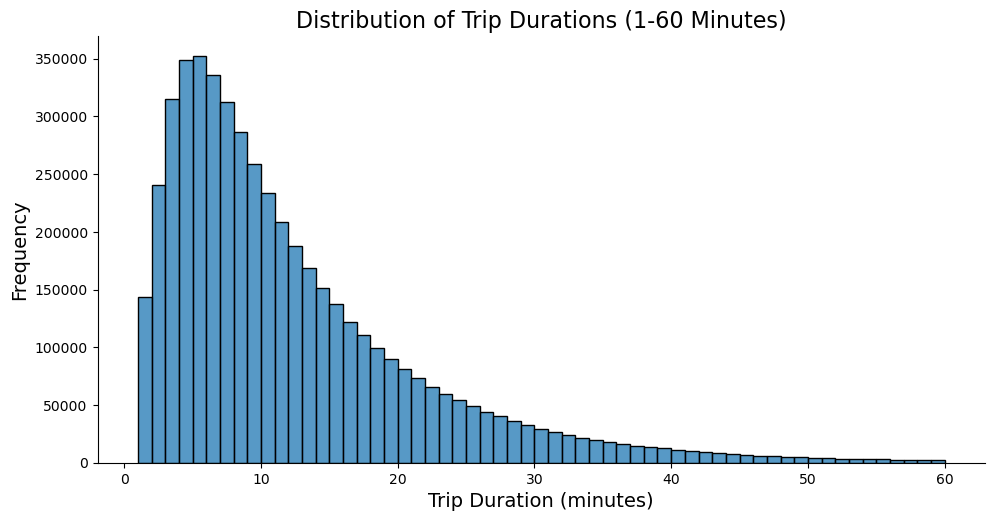

In [93]:
sns.displot(data=df, x="trip_duration", bins=range(1, 61), aspect=10/5)
plt.title("Distribution of Trip Durations (1-60 Minutes)", fontsize=16)
plt.xlabel("Trip Duration (minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [97]:
df['start hour']=df['started_at'].dt.hour.astype('category')
df['start day']=df['started_at'].dt.day.astype('category') 
df['weekday']=df['started_at'].dt.weekday.astype('category')

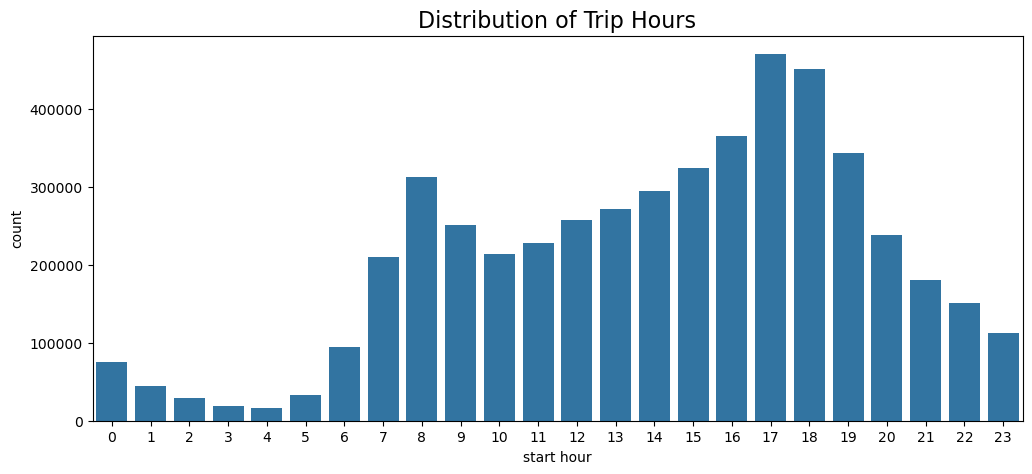

In [101]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Trip Hours", fontsize=16)
sns.countplot(data=df, x="start hour" ) ;

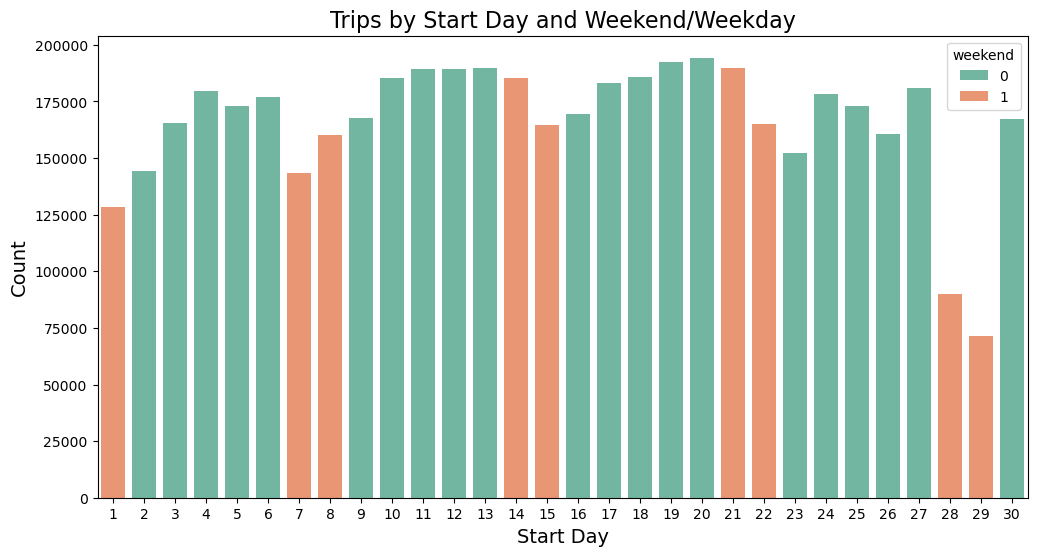

In [109]:
# Create a 'weekend' column based on the 'weekday' column
df['weekend'] = 0  # Initialize all as weekdays (0 = weekday)
df.loc[df['weekday'].isin([5, 6]), 'weekend'] = 1  # Set to 1 for Saturday (5) and Sunday (6)

# Plot the data
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
sns.countplot(data=df, x="start day", hue="weekend", dodge=False)
plt.title("Trips by Start Day and Weekend/Weekday", fontsize=16)
plt.xlabel("Start Day", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


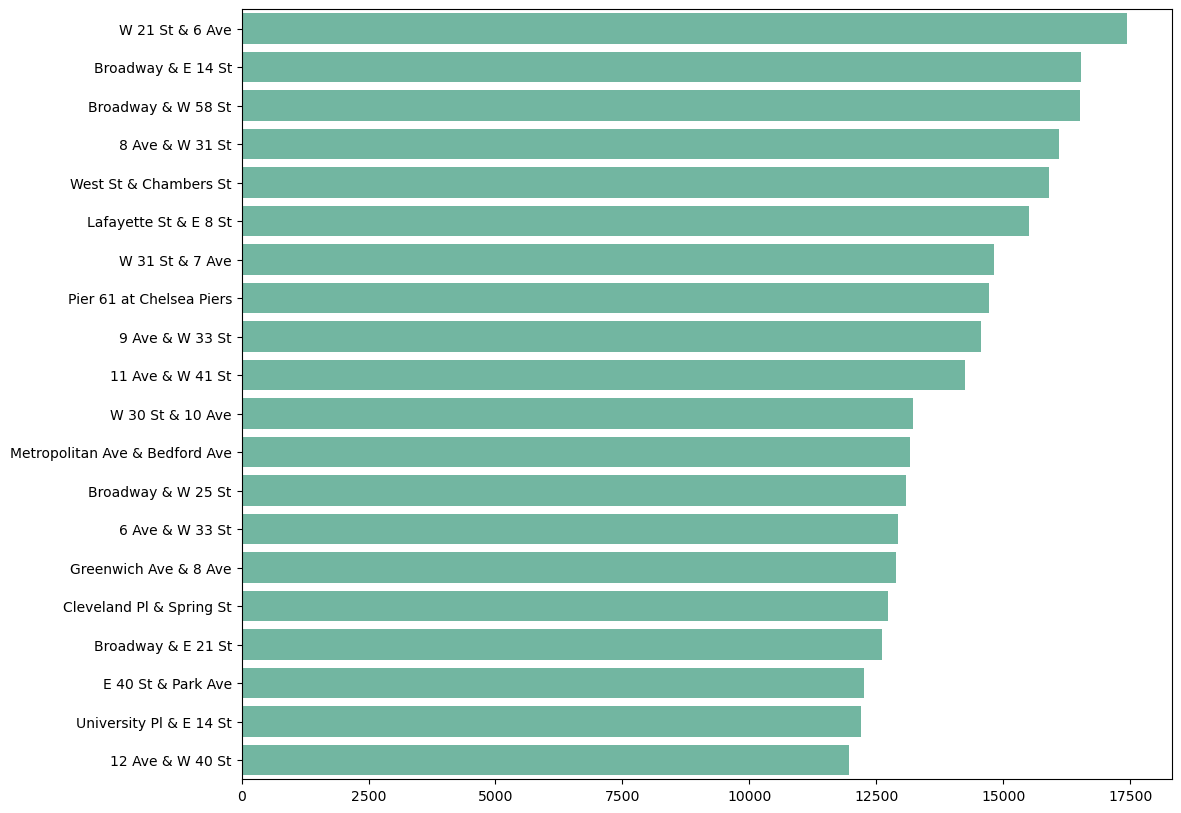

In [115]:
startstation = df['start_station_name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  )
plt.savefig("top_stations.PNG");

In [117]:
#calculate distances between start and end longatitude and latitude using haversine formula

In [133]:
df['start day']=df['started_at'].dt.day.astype('category')
df['weekday']=df['started_at'].dt.weekday.astype('category')
df['weekend'] = [ d >=5 for d in df['weekday']]

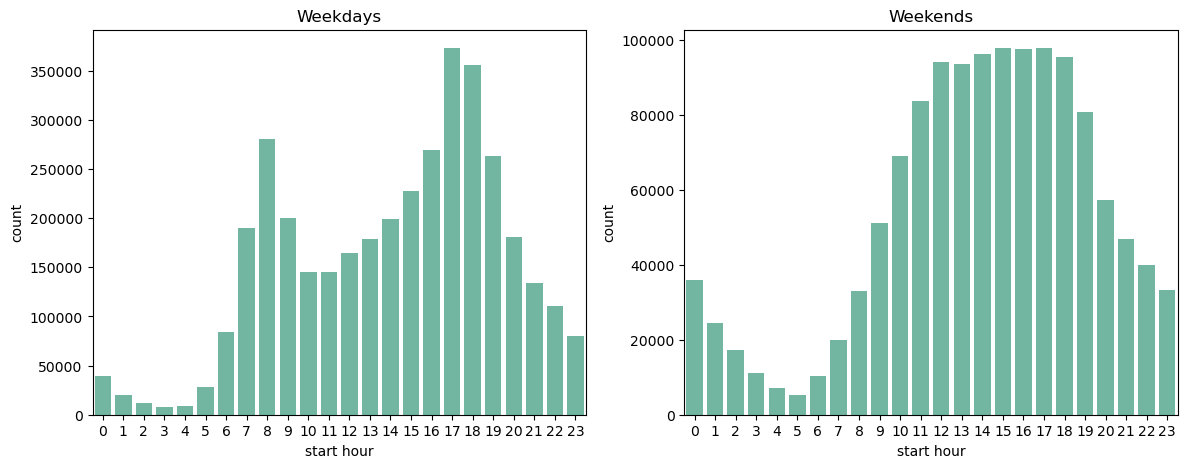

In [135]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=df[~df['weekend']],x="start hour",\
  ax=ax[0]).set_title("Weekdays")
sns.countplot(data=df[df['weekend']],x="start hour",\
  ax=ax[1]).set_title("Weekends") ;

In [137]:
# Group by day and calculate aggregates
df_weather['day'] = df_weather['time'].dt.day
daily_weather = df_weather.groupby('day').agg({
    'temperature': 'mean',
    'prcp': 'sum',
    'wspd': 'mean'
}).reset_index()

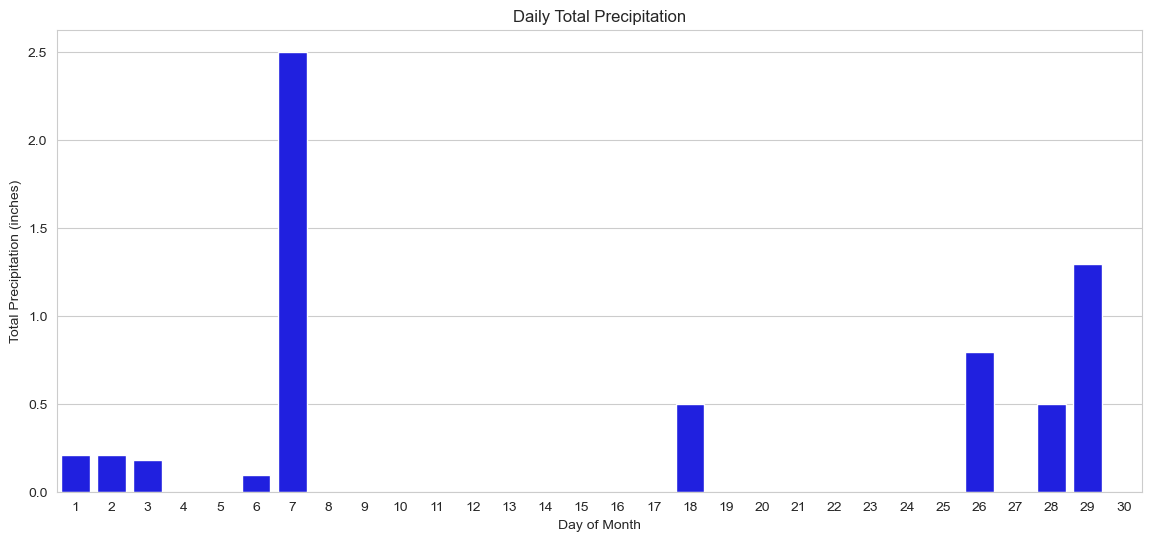

In [139]:
# Plot daily aggregated data
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=daily_weather, x="day", y="prcp", color="blue")
ax.set(xlabel="Day of Month", ylabel="Total Precipitation (inches)", title="Daily Total Precipitation")
plt.show()

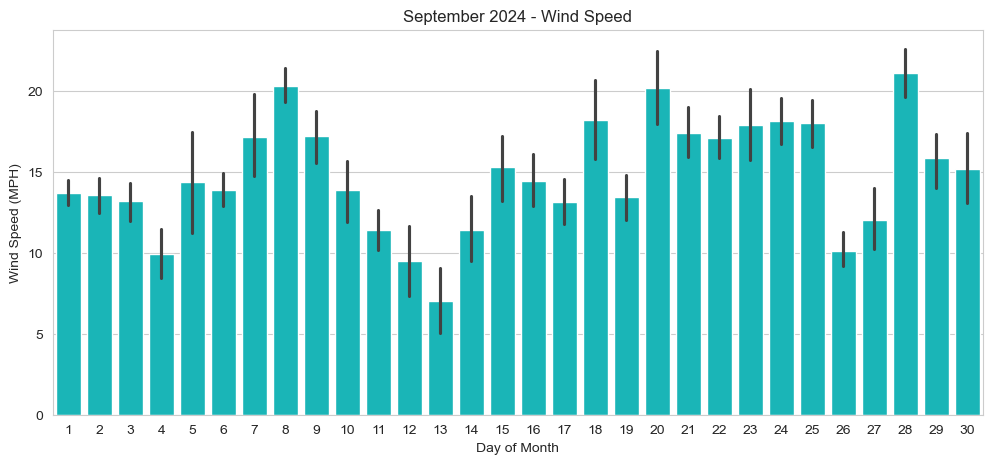

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 'day' from the 'time' column
df_weather['day'] = df_weather['time'].dt.day

# Plot wind speed
plt.figure(figsize=(12, 5))
sns.barplot(data=df_weather, x='day', y='wspd', color="darkturquoise")

# Add title and labels
plt.title("September 2024 - Wind Speed")
plt.xlabel("Day of Month")
plt.ylabel("Wind Speed (MPH)")

# Display the plot
plt.show()


In [149]:
#most popular trips

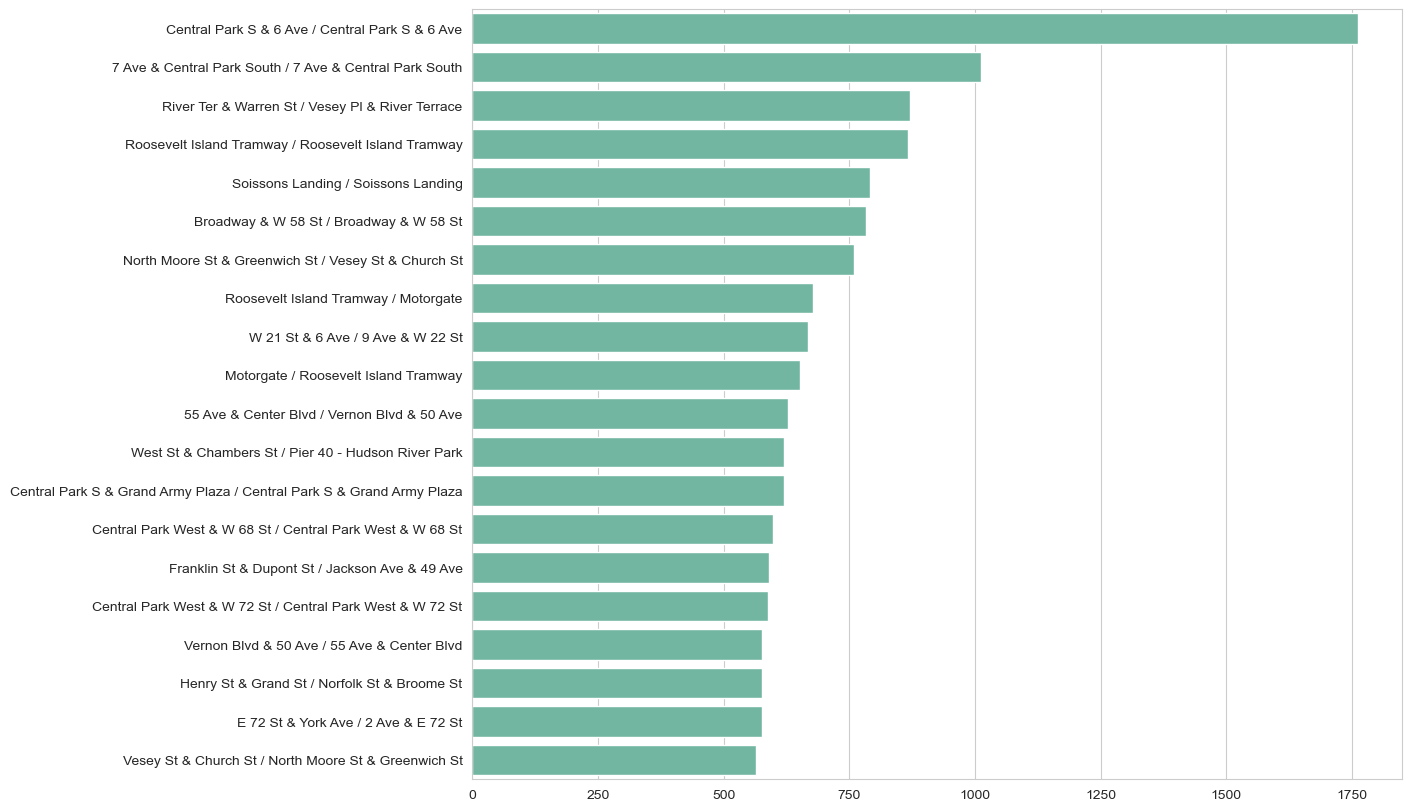

In [155]:
trips=df.value_counts(['start_station_name','end_station_name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h")
plt.savefig("most_popular_trips.PNG", bbox_inches='tight');

In [157]:
# Save the DataFrame as a CSV file
trip_and_weather_data.to_csv('trip_and_weather_data.csv', index=False)

print("DataFrame saved successfully!")


DataFrame saved successfully!


In [1]:
import pandas as pd

In [81]:
df = pd.read_csv("trip_and_weather_data.csv")

C:\Users\flahi\AppData\Local\Temp\ipykernel_11272\823684582.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("trip_and_weather_data.csv")


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

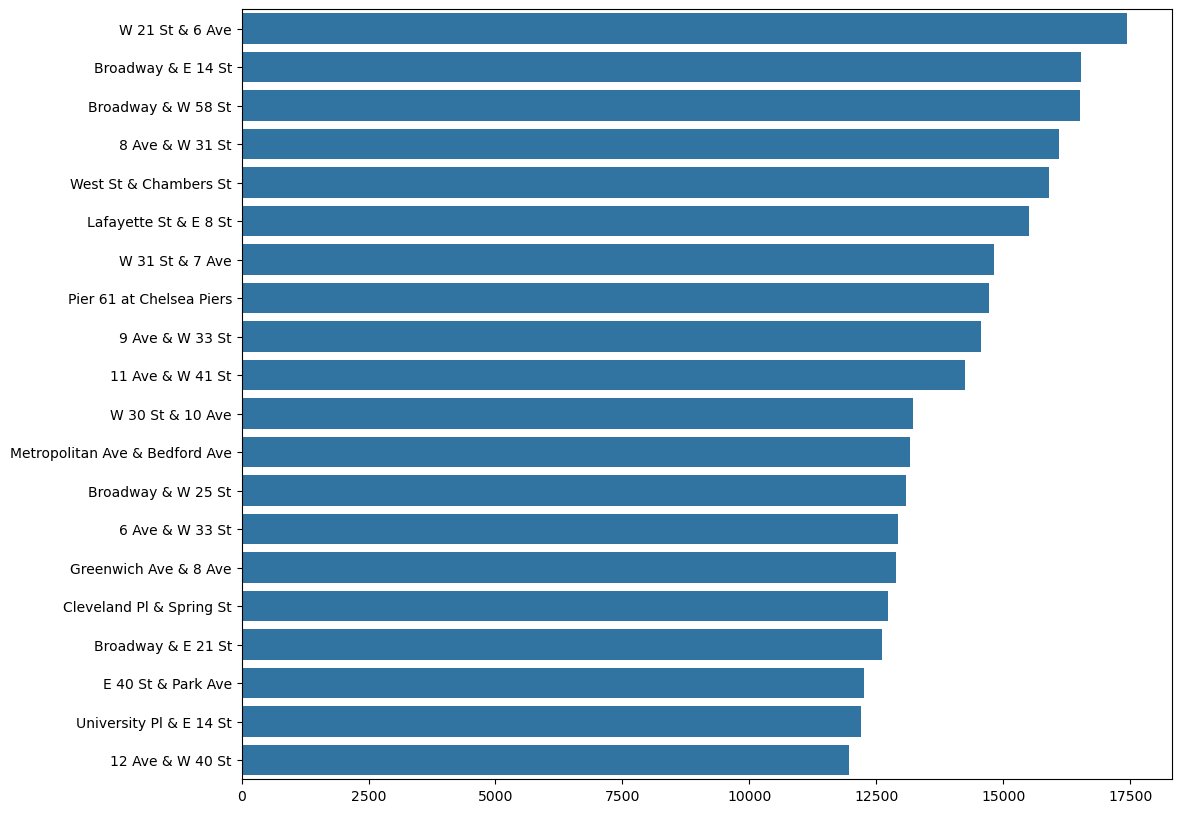

In [9]:
startstation = df['start_station_name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  )
plt.savefig("top_stations.PNG");

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
# Get the top 20 start stations
startstation = df['start_station_name'].value_counts()[:20]
top_stations_df = df[df['start_station_name'].isin(startstation.index)][['start_station_name', 'start_lat', 'start_lng']].drop_duplicates()

In [55]:
import folium
from IPython.display import display

# Step 1: Calculate the Center of Manhattan (Approximate)
manhattan_center = [40.7831, -73.9712]  # Latitude and Longitude for Manhattan

# Step 2: Create a Folium Map
m = folium.Map(location=manhattan_center, zoom_start=13, tiles='OpenStreetMap')

# Step 3: Add Markers for Each Station
for idx, row in top_stations_df.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],  # Station Latitude and Longitude
        popup=row['start_station_name'],  # Station Name for Popup
        icon=folium.Icon(color='red', icon='info-sign')  # Customize Marker Icon
    ).add_to(m)

# Step 4: Display Map in Notebook
display(m)


In [57]:
import folium
from IPython.display import display

# Step 1: Calculate the Center of the Data (Approximate)
# Use the mean latitude and longitude for the center of the map
center_lat = top_stations_df['start_lat'].mean()
center_lng = top_stations_df['start_lng'].mean()

# Step 2: Create a Folium Map
m = folium.Map(location=[center_lat, center_lng], zoom_start=12, tiles='OpenStreetMap')

# Step 3: Add Markers for Each Top Station
for idx, row in top_stations_df.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],  # Station Latitude and Longitude
        popup=row['start_station_name'],  # Station Name for Popup
        icon=folium.Icon(color='blue', icon='info-sign')  # Customize Marker Icon
    ).add_to(m)

# Step 4: Display Map in Notebook
display(m)


In [59]:
import folium
from IPython.display import display

# Step 1: Calculate the Center of the Data (Approximate)
center_lat = top_stations_df['start_lat'].mean()
center_lng = top_stations_df['start_lng'].mean()

# Step 2: Create a Folium Map
m = folium.Map(location=[center_lat, center_lng], zoom_start=12, tiles='OpenStreetMap')

# Step 3: Add Circle Markers for Each Top Station
for idx, row in top_stations_df.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],  # Station Latitude and Longitude
        radius=4,  # Smaller radius for less clutter
        color='blue',  # Marker border color
        fill=True,  # Fill the circle
        fill_color='blue',  # Fill color
        fill_opacity=0.7,  # Transparency of the fill
        popup=row['start_station_name']  # Station Name for Popup
    ).add_to(m)

# Step 4: Display Map in Notebook
display(m)


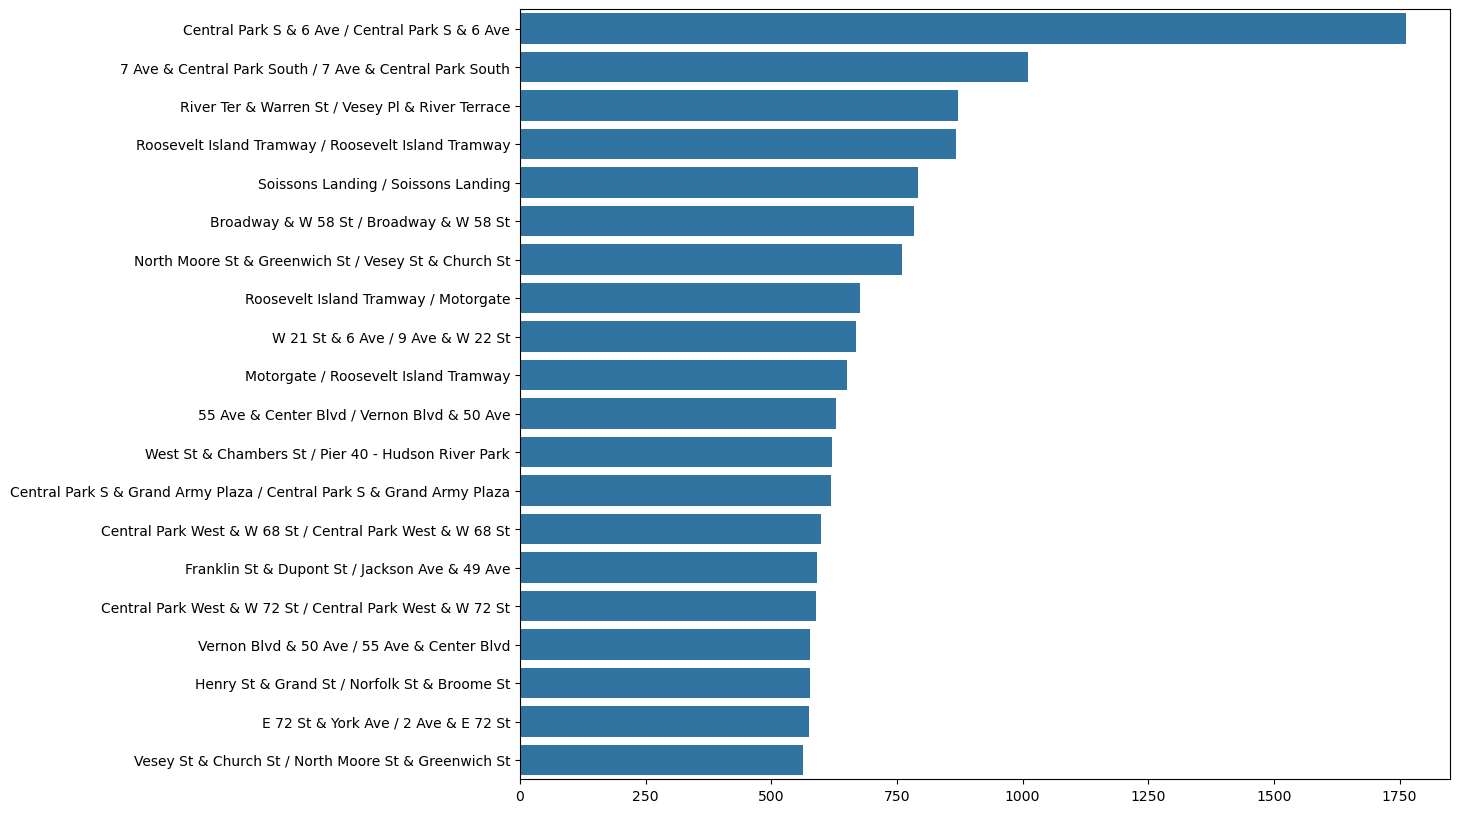

In [63]:
trips=df.value_counts(['start_station_name','end_station_name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h")
plt.savefig("most_popular_trips.PNG", bbox_inches='tight');

C:\Users\flahi\AppData\Local\Temp\ipykernel_11272\2883457318.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes['trip_count'], y=top_routes['route'], orient="h", palette="Blues_d")


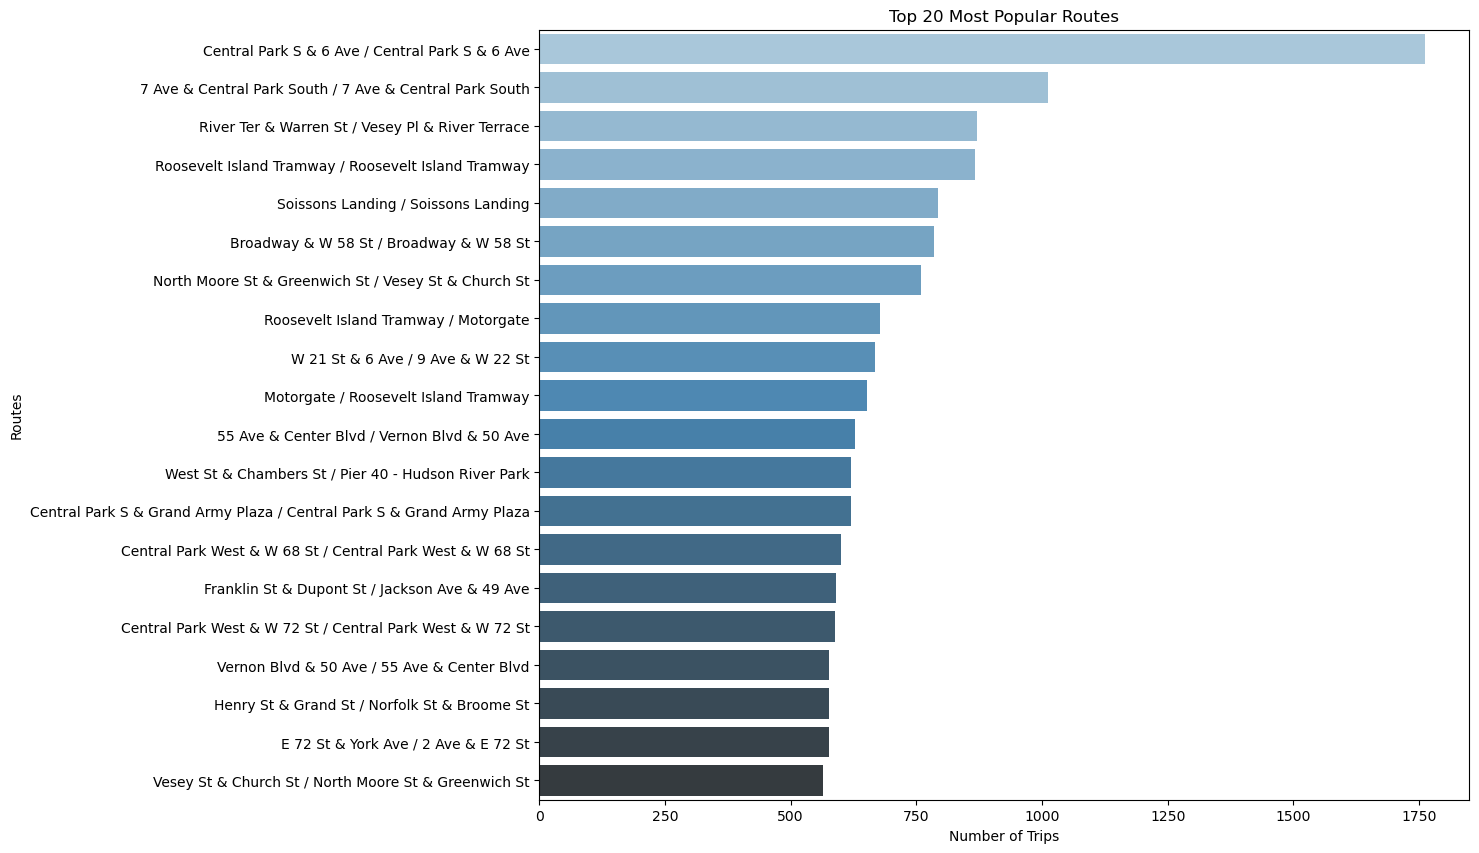

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_count,route
203495,Central Park S & 6 Ave,Central Park S & 6 Ave,40.765909,-73.976342,40.765909,-73.976342,1762,Central Park S & 6 Ave / Central Park S & 6 Ave
95865,7 Ave & Central Park South,7 Ave & Central Park South,40.766741,-73.979069,40.766741,-73.979069,1011,7 Ave & Central Park South / 7 Ave & Central P...
551871,River Ter & Warren St,Vesey Pl & River Terrace,40.717599,-74.015880,40.715338,-74.016584,871,River Ter & Warren St / Vesey Pl & River Terrace
559851,Roosevelt Island Tramway,Roosevelt Island Tramway,40.757284,-73.953600,40.757284,-73.953600,867,Roosevelt Island Tramway / Roosevelt Island Tr...
574848,Soissons Landing,Soissons Landing,40.692317,-74.014866,40.692317,-74.014866,792,Soissons Landing / Soissons Landing


In [73]:
# Get the top 20 most popular routes with start and end lat/lng
top_routes = (
    df.groupby(['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(20)
)

# Combine start and end station names for visualization
top_routes['route'] = top_routes['start_station_name'] + ' / ' + top_routes['end_station_name']

# Plot the top routes
plt.figure(figsize=(12, 10))
sns.barplot(x=top_routes['trip_count'], y=top_routes['route'], orient="h", palette="Blues_d")
plt.title("Top 20 Most Popular Routes")
plt.xlabel("Number of Trips")
plt.ylabel("Routes")
plt.savefig("most_popular_trips_with_coords.PNG", bbox_inches="tight")
plt.show()

# Preview the resulting DataFrame
top_routes.head()


In [75]:
import folium
from IPython.display import display

# Create a base map centered around NYC
map_center = [40.730610, -73.935242]  # General center of NYC
route_map = folium.Map(location=map_center, zoom_start=12)

# Add each route to the map
for _, row in top_routes.iterrows():
    start_coords = [row['start_lat'], row['start_lng']]
    end_coords = [row['end_lat'], row['end_lng']]
    
    # Add start and end markers
    folium.CircleMarker(
        location=start_coords,
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"Start: {row['start_station_name']}"
    ).add_to(route_map)

    folium.CircleMarker(
        location=end_coords,
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"End: {row['end_station_name']}"
    ).add_to(route_map)

    # Add a line between start and end
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color='green',
        weight=2.5,
        opacity=0.7
    ).add_to(route_map)

# Display the map in the notebook
display(route_map)


In [77]:
#trips excluding loops

In [88]:
trips_no_loop = df[df['start_station_id'] != df['end_station_id']].\
  value_counts(['start_station_name','end_station_name'])[:20]

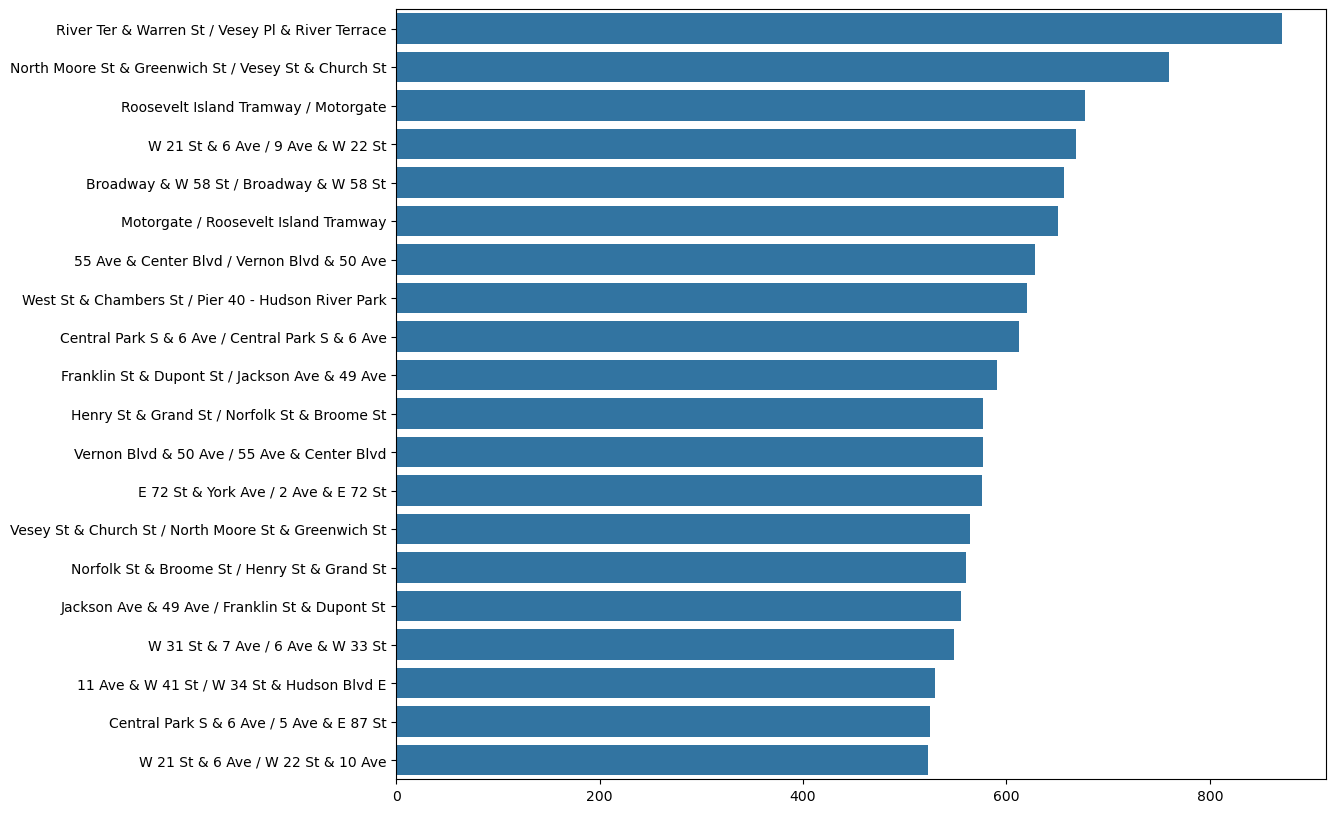

In [89]:
trip_names2=[trips_no_loop.index[t][0] + ' / ' + trips_no_loop.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips_no_loop.values), y = trip_names2, orient="h")
plt.savefig("most_popular_trips.PNG", bbox_inches='tight');

In [92]:
import folium
from IPython.display import display

# Create a new DataFrame with the start and end coordinates
top_routes_no_loops = df[df['start_station_id'] != df['end_station_id']].value_counts(
    ['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']
).reset_index(name='count').head(20)

# Create a base map centered around NYC
map_center = [40.730610, -73.935242]  # General center of NYC
route_map_no_loops = folium.Map(location=map_center, zoom_start=12)

# Add each route to the map
for _, row in top_routes_no_loops.iterrows():
    start_coords = [row['start_lat'], row['start_lng']]
    end_coords = [row['end_lat'], row['end_lng']]
    
    # Add start and end markers
    folium.CircleMarker(
        location=start_coords,
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"Start: {row['start_station_name']}"
    ).add_to(route_map_no_loops)

    folium.CircleMarker(
        location=end_coords,
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        tooltip=f"End: {row['end_station_name']}"
    ).add_to(route_map_no_loops)

    # Add a line between start and end
    folium.PolyLine(
        locations=[start_coords, end_coords],
        color='green',
        weight=2.5,
        opacity=0.7
    ).add_to(route_map_no_loops)

# Display the map in the notebook
display(route_map_no_loops)
